# Deep Learning
## Formative assessment
### Week 2: Multilayer perceptrons

#### Instructions

In this notebook, you will write code to implement and train a multilayer perceptron in TensorFlow using the high-level Keras API.

Some code cells are provided you in the notebook. You should avoid editing provided code, and make sure to execute the cells in order to avoid unexpected errors. Some cells begin with the line: 

`#### GRADED CELL ####`

These cells require you to write your own code to complete them.

#### Let's get started!

We'll start by running some imports, and loading the dataset. 

In [1]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pathlib import Path

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# If you would like to make further imports from Tensorflow, add them here




<img src="figures/bike_sharing.jpg" title="Bike sharing" style="width: 500px;"/>
<center><font style="font-size:12px">source: <a href=https://www.visitlondon.com/traveller-information/getting-around-london/london-cycle-hire-scheme>visitlondon.com</a></font></center>

#### The Bike Sharing dataset
In this formative assessment, you will use the [Bike Sharing dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) from the UCI Machine Learning Repository. This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

* Fanaee-T, H,, & Gama, J. (2013), "Event labeling combining ensemble detectors and background knowledge", _Progress in Artificial Intelligence_, 1-15, Springer Berlin Heidelberg.

Your goal is to use TensorFlow to model the dataset using linear regression and MLP networks.

#### Load and preprocess the data

In [2]:
# Run this cell to load and sample the data

df = pd.read_csv(Path("./data/bike_sharing.csv"))
df.sample(10)

,year,season,month,day_name,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
12153,2012,2,5,Saturday,14,0,6,0,1,0.76,0.7273,0.66,0.2239,307,257
13097,2012,3,7,Wednesday,22,1,3,0,1,0.82,0.7879,0.56,0.2239,175,327
8908,2012,1,1,Thursday,1,0,4,1,3,0.36,0.3485,0.93,0.1940,0,3
1147,2011,1,2,Sunday,14,0,0,0,1,0.36,0.3485,0.27,0.1642,108,104
3098,2011,2,5,Saturday,0,0,6,0,2,0.50,0.4848,0.88,0.1343,24,78
5638,2011,3,8,Sunday,9,0,0,0,1,0.66,0.6212,0.74,0.4179,7,46
9362,2012,1,1,Tuesday,0,0,2,1,1,0.28,0.2727,0.52,0.2537,0,15
8507,2011,1,12,Monday,5,1,1,0,1,0.34,0.3030,0.42,0.3881,0,4
8235,2011,4,12,Wednesday,19,0,3,1,2,0.36,0.3636,0.62,0.1045,9,259
9965,2012,1,2,Saturday,6,0,6,0,2,0.30,0.2727,0.42,0.2985,1,12


See [the dataset description](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) for more information on the attributes. There are two target variables: `casual` (number of casual users) and `registered` (number of registered users).

You should first complete the following `get_inputs_and_targets` function, according to the following spec:

* The function takes inputs `dataframe` and `target_variables`
  * The `target_variables` is a list of column names that we will use for the targets
* The function should return a tuple of DataFrames `(inputs_df, targets_df)`, where `targets_df` contains only the columns in `target_variables`, and `inputs_df` contains all the remaining columns.

In [3]:
tf.ones([1,2])

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 1.]], dtype=float32)>

In [4]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_inputs_and_targets(dataframe, target_variables):
    """
    This function takes in the loaded DataFrame and target_variables list as above, 
    and returns inputs and targets DataFrames.
    """
    target_df = dataframe[target_variables]
    input_df = dataframe.drop(target_variables, axis=1)
    return input_df, target_df
    

In [9]:
# Run your function to get the input and target Tensors

inputs_df, targets_df = get_inputs_and_targets(df, target_variables=['casual', 'registered'])

The data will need some preprocessing before it is ready to be used to train a deep learning model. 

Firstly, several of the attributes are categorical: `year`, `season`, `month`, `day_name`, `hr`, `holiday`, `weekday`, `workingday` and `weathersit`. We will represent each of these attributes with a one-hot encoding. For example, `year` takes one of the values `2011` or `2012` in the dataset. Will represent the year of a data example as either the one-hot vector `[1, 0]` or `[0, 1]`, corresponding to the year `2011` or `2012` respectively. In general, the length of the one-hot vector will equal the number of categories, and will be all zeros except for a single one in the place of the corresponding category for a particular data example.

The final representation of our inputs will be the concatenation of all features, including one-hot vectors.

You should now complete the following `convert_to_one_hot` function, according to the following specifications:

* The function takes the inputs `inputs_dataframe` and `categorical_attributes`
    * `categorical_attributes` will be a list of column names that are present in `inputs_dataframe`
* The function should convert each categorical feature to a one-hot vector by replacing the column with a number of columns equal to the number of categories
* The function should then return the updated DataFrame

_Hint: see [`pd.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), and note that numerical columns can be converted to `category` type in order for this function to correctly the column as categorical._

In [10]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def convert_to_one_hot(inputs_dataframe, categorical_attributes):
    """
    This function takes in the loaded DataFrame and categorical_attributes list as above, 
    and converts the categorical features to one-hot encodings.
    Your function should return the DataFrame.
    """
     # since 2011 and 2012 are not numerical attributes though might be treated as such so we convert them to categorical attributes
    inputs_dataframe[categorical_attributes] = inputs_dataframe[categorical_attributes].astype('category')
    return pd.get_dummies(inputs_dataframe) # numerical attributes are not affected by this operation

In [11]:
# Run your function to convert the categorical features to one-hot encodings

cols = ['year', 'season', 'month', 'day_name', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
inputs_df = convert_to_one_hot(inputs_df, cols)

In [12]:
inputs_df.sample(10)

,temp,atemp,hum,windspeed,year_2011,year_2012,season_1,season_2,season_3,season_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
14293,0.74,0.6667,0.48,0.2239,False,True,False,False,True,False,...,False,True,False,False,False,True,True,False,False,False
8650,0.28,0.2879,0.81,0.1045,False,True,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1458,0.42,0.4242,0.77,0.2836,True,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
16375,0.34,0.3485,0.66,0.1045,False,True,False,False,False,True,...,False,False,False,False,False,True,True,False,False,False
9783,0.40,0.4091,0.37,0.3582,False,True,True,False,False,False,...,False,False,True,False,False,True,True,False,False,False
1104,0.64,0.6212,0.33,0.3284,True,False,True,False,False,False,...,False,False,True,False,False,True,True,False,False,False
16127,0.42,0.4242,0.44,0.1343,False,True,False,False,False,True,...,False,False,True,False,False,True,True,False,False,False
9082,0.12,0.1515,0.54,0.1045,False,True,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False
7506,0.48,0.4697,0.67,0.3284,True,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
7636,0.34,0.3333,0.71,0.1343,True,False,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False


In the second stage of preprocessing, we will scale the values in both the inputs and the targets.

You should now complete the following `scale_values` function, according to the following spec:

* The function takes the `inputs_df` and `targets_df` DataFrames as arguments
* The feature values in `inputs_df` should be linearly scaled to the range $[0, 1]$. Note that this will not affect the features that have been one-hot encoded. _Hint: use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from `sklearn`._
* The values in the `targets_df` are counts, and these should be converted as follows:
$$\text{count} \mapsto \log (1 + \text{count})$$
where the log is the natural logarithm.
* The function should then return a tuple of Tensors `(inputs, targets)` of type `tf.float32` with the transformed values

In [13]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def scale_values(inputs_df, targets_df):
    """
    This function takes in the inputs and targets DataFrames and scales the values
    in each DataFrame according to the above description.
    Your function should return a tuple of Tensors.
    """
    scaler = MinMaxScaler()
    inputs = scaler.fit_transform(inputs_df)
    inputs = tf.constant(inputs, dtype=tf.float32)
    
    targets = np.log(1. + targets_df).values
    targets = tf.constant(targets, dtype=tf.float32)
    return inputs, targets
    

In [14]:
# Run your function to get the scaled inputs and outputs Tensors

inputs, targets = scale_values(inputs_df, targets_df)

In [17]:
# Split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(inputs.numpy(), targets.numpy(), test_size=0.3)

X_train, y_train = tf.constant(X_train), tf.constant(y_train)
X_val, y_val = tf.constant(X_val), tf.constant(y_val)

#### Linear regression model

We will first fit a simple linear regression model to the training data. Recall that this is a model of the form

$$
y = f_\theta(\mathbf{x}) + \epsilon,
$$

where $y\in\mathbb{R}^C$ is the target variable, $\mathbf{x}\in\mathbb{R}^{D}$ are the input features, $\Theta\in\mathbb{R}^{C\times D+1}$ are the model parameters, $\epsilon\in\mathbb{R}^C$ with $(\epsilon)_c\sim\mathcal{N}(0, 1)$ $(c=1,\ldots,C)$ is the observation noise random variable, and $f_\Theta:\mathbb{R}^{D+1}\mapsto\mathbb{R}$ is given by

$$
f_\Theta(\hat{\mathbf{x}}) = \Theta\hat{\mathbf{x}},
$$

where $\hat{\mathbf{x}}\in\mathbb{R}^{D+1}$ is constructed by adding a constant 1 feature to $\mathbf{x}$; that is, $\hat{\mathbf{x}}_0=1$.

We will use the Keras API to implement a linear regression model, using the `Sequential` class.

In the following function, you should build a `Sequential` model with just one `Dense` layer, which has two output units, one for each target variable, and no activation function. This is the same as the linear regression model above.

* The function takes the `input_shape` as an argument, which should be used in the `Dense` layer initializer to specify the input shape
* The function should build and return the `Sequential` object with one Dense layer with two output neurons, and no activation function

In [18]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def sequential_linear_regression(input_shape):
    """
    This function takes the input_shape as argument to build a Sequential model as 
    specified above. 
    The function should then return the Sequential model.
    """
    model = Sequential([
        Dense(2, input_shape=input_shape),
    ])
    return model
    

In [19]:
# Run your function to build the model and print the model summary

lr_model = sequential_linear_regression(input_shape=X_train.shape[1:])
lr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 138       
                                                                 
Total params: 138 (552.00 Byte)
Trainable params: 138 (552.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


You should now compile and fit the model to the training data. 

* The following function takes the following arguments:
  * `sequential_model`: a Sequential model to fit to the training data
  * `num_epochs`: a positive integer that defines the number of epochs to train the model
  * `training_data`: a 2-tuple of Tensors (inputs, targets) for the training data
  * `val_data`: a 2-tuple of Tensors (inputs, targets) for the validation data
  * `batch_size`: a positive integer that defines the number of examples in each minibatch
* The function should compile the model with the mean squared error loss and the SGD optimizer
* The function should then fit the model to the training data for `num_epochs` epochs and save the returned history object
* Your function should then return the history object

_Hint: for the validation data, use the `validation_data` keyword argument (see [the docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit))._

In [20]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def compile_and_fit(sequential_model, num_epochs, training_data, val_data, batch_size):
    """
    This function should compile and fit the sequential_model as described above. 
    The function should then return the history object that is returned from the fit method.
    """
    sequential_model.compile(optimizer='sgd', loss='mse')
    history = sequential_model.fit(training_data[0], training_data[1], epochs=num_epochs, batch_size=batch_size, validation_data=val_data)
    return history
    

In [21]:
# Run your function to compile and fit the model

history = compile_and_fit(lr_model, num_epochs=30, training_data=(X_train, y_train), 
                          val_data=(X_val, y_val), batch_size=128)

Epoch 1/30
96/96 [==============================] - 0s 1ms/step - loss: 3.3933 - val_loss: 1.7733
Epoch 2/30
96/96 [==============================] - 0s 486us/step - loss: 1.6033 - val_loss: 1.5602
Epoch 3/30
96/96 [==============================] - 0s 490us/step - loss: 1.4354 - val_loss: 1.4138
Epoch 4/30
96/96 [==============================] - 0s 491us/step - loss: 1.3135 - val_loss: 1.3030
Epoch 5/30
96/96 [==============================] - 0s 485us/step - loss: 1.2160 - val_loss: 1.2095
Epoch 6/30
96/96 [==============================] - 0s 489us/step - loss: 1.1334 - val_loss: 1.1337
Epoch 7/30
96/96 [==============================] - 0s 490us/step - loss: 1.0619 - val_loss: 1.0612
Epoch 8/30
96/96 [==============================] - 0s 776us/step - loss: 0.9988 - val_loss: 0.9985
Epoch 9/30
96/96 [==============================] - 0s 488us/step - loss: 0.9417 - val_loss: 0.9442
Epoch 10/30
96/96 [==============================] - 0s 484us/step - loss: 0.8913 - val_loss: 0.8938
E

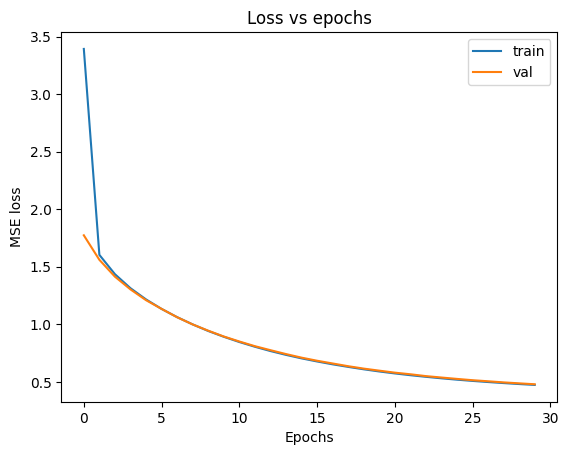

In [22]:
# Plot the losses

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE loss")
plt.legend()
plt.show()

We can see that our linear regression model is underfitting. 

In [23]:
# Compute the train and validation loss of the linear regression Sequential model

print("Model train loss: {}".format(lr_model.evaluate(X_train, y_train, verbose=0)))
print("Model validation loss: {}".format(lr_model.evaluate(X_val, y_val, verbose=0)))

Model train loss: 0.46860823035240173
Model validation loss: 0.47848138213157654


Note that the model above is equivalent to fitting separate linear regression models for each scalar target output (`casual` and `registered`). However, these two models are clearly very closely related, and there is likely to be shared features that would be helpful for both models. 

In addition, we would like to train a higher capacity model to attempt to alleviate the underfitting we see in the linear regression model.

Both of these reasons are motivation for training a deeper multilayer perceptron (MLP) model. This is a higher capacity model that simple linear regression, and we expect that the intermediate features represented by the hidden layers will learn features of the data that are useful for predicting both of the target variables.

You should now complete the following `get_mlp` function to build an MLP model according to the following spec:

* The function takes the arguments `input_shape` and `hidden_layers`
* `hidden_layers` is a list of integers, corresponding to the number of neurons in the hidden layers
* The function should build the MLP using the `Sequential` API
  * It should use the `input_shape` argument in the first layer of the model
  * The hidden layers should each use a ReLU activation function
  * The output layer should have 2 neurons, and not use an activation function
* The function should then return the model object

In [24]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_mlp(input_shape, hidden_layers):
    """
    This function takes the input_shape, hidden_layers and output_units as arguments 
    to build a Sequential model as specified above. 
    The function should then return the Sequential model.
    """
    length_of_hidden_layers = len(hidden_layers)
    model = Sequential()
    for i in range(length_of_hidden_layers):
        if i == 0:
            model.add(Dense(hidden_layers[i], input_shape=input_shape, activation='relu'))
        else:
            model.add(Dense(hidden_layers[i], activation='relu'))
    if length_of_hidden_layers == 0:
        model.add(Dense(2, input_shape=input_shape))
    else:
        model.add(Dense(2))
    return model
    

In [26]:
# Run your function to build the model and print the model summary

mlp_model = get_mlp(input_shape=X_train.shape[1:], hidden_layers=[64, 32])
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                4416      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 6562 (25.63 KB)
Trainable params: 6562 (25.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Run your compile_and_fit function on the MLP

history = compile_and_fit(mlp_model, num_epochs=30, training_data=(X_train, y_train), 
                          val_data=(X_val, y_val), batch_size=128)

Epoch 1/30
96/96 [==============================] - 0s 1ms/step - loss: 2.2528 - val_loss: 1.6275
Epoch 2/30
96/96 [==============================] - 0s 569us/step - loss: 1.1842 - val_loss: 1.2447
Epoch 3/30
96/96 [==============================] - 0s 700us/step - loss: 0.7698 - val_loss: 0.6770
Epoch 4/30
96/96 [==============================] - 0s 577us/step - loss: 0.5490 - val_loss: 0.8257
Epoch 5/30
96/96 [==============================] - 0s 586us/step - loss: 0.4776 - val_loss: 0.4629
Epoch 6/30
96/96 [==============================] - 0s 573us/step - loss: 0.4429 - val_loss: 0.6711
Epoch 7/30
96/96 [==============================] - 0s 856us/step - loss: 0.4264 - val_loss: 0.4367
Epoch 8/30
96/96 [==============================] - 0s 579us/step - loss: 0.4090 - val_loss: 0.6074
Epoch 9/30
96/96 [==============================] - 0s 578us/step - loss: 0.3982 - val_loss: 0.4015
Epoch 10/30
96/96 [==============================] - 0s 573us/step - loss: 0.3853 - val_loss: 0.3896
E

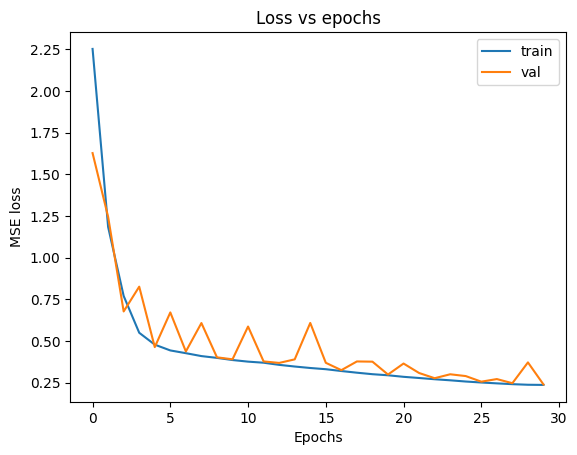

In [28]:
# Plot the losses

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE loss")
plt.legend()
plt.show()

In [29]:
# Compute the train and validation loss of the linear regression Sequential model

print("Model train loss: {}".format(mlp_model.evaluate(X_train, y_train, verbose=0)))
print("Model validation loss: {}".format(mlp_model.evaluate(X_val, y_val, verbose=0)))

Model train loss: 0.23059795796871185
Model validation loss: 0.2385626882314682


The model performance has improved significantly using the MLP instead of linear regression. However, there is still room for improvement - the model is still underfitting and so we should try further increasing the capacity. You should try re-building and training MLP models for different hyperparameter settings to see how much you are able to improve the performance.

Congratulations on completing this week's assignment! You have now implemented linear regression using the Keras API, as well as an MLP model, and compared the performance.